In [1]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

import feather
import os

kag_dir = "B:\\kaggle_nfl\\all"

In [2]:
df = pd.read_csv(os.path.join(kag_dir, "game_data.csv"))
df.head()

,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,HomeTeamCode,Visit_Team,VisitTeamCode,Stadium,StadiumType,Turf,GameWeather,Temperature,OutdoorWeather
0,1,2016,Pre,1,2016-08-07 00:00:00.000,Sunday,Indianapolis,20:00,Indianapolis Colts,IND,Green Bay Packers,GB,Tom Benson Hall of Fame Stadium,Outdoor,Turf,NaN,NaN,NaN
1,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,LA,Dallas Cowboys,DAL,Los Angeles Memorial Coliseum,Outdoor,Grass,Sunny,79.0,Sunny
2,3,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Baltimore,19:30,Baltimore Ravens,BLT,Carolina Panthers,CAR,M&T Bank Stadium,Outdoor,Natural Grass,Party Cloudy,94.0,Partly Cloudy
3,4,2016,Pre,2,2016-08-12 00:00:00.000,Friday,Green Bay,19:00,Green Bay Packers,GB,Cleveland Browns,CLV,Lambeau Field,Outdoor,DD GrassMaster,NaN,73.0,NaN
4,5,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Chicago,19:00,Chicago Bears,CHI,Denver Broncos,DEN,Soldier Field,Outdoor,Grass,"Partly Cloudy, Chance of Rain 80%",88.0,NaN


In [3]:
#Overall, there are 666 games in our data
df.shape

(666, 18)

In [4]:
df.describe()

,GameKey,Season_Year,Week,Temperature
count,666.000000,666.000000,666.000000,600.000000
mean,333.500000,2016.500000,7.723724,64.131667
std,192.401923,0.500376,5.060709,18.563818
min,1.000000,2016.000000,1.000000,1.000000
25%,167.250000,2016.000000,3.000000,54.000000
50%,333.500000,2016.500000,6.000000,68.000000
75%,499.750000,2017.000000,12.000000,78.250000
max,666.000000,2017.000000,17.000000,97.000000


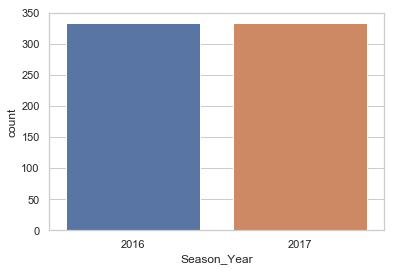

In [7]:
# For this set (in isolation), we mostly just want to confirm that our games between season have the same characteristics

# number of games per season
ax= sns.countplot(x="Season_Year", data=df)

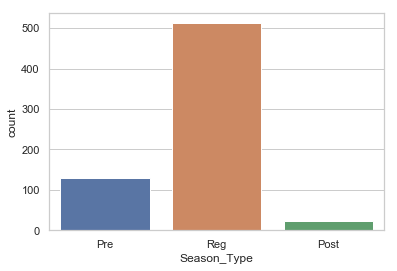

In [8]:
# Number of games in each season subset
ax= sns.countplot(x="Season_Type", data=df)

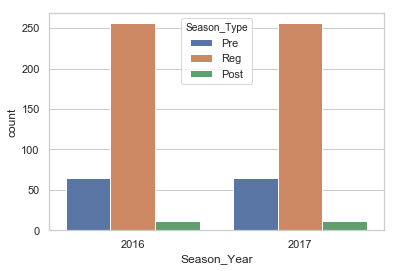

In [5]:
#Games in each season by season subset
ax= sns.countplot(x="Season_Year", hue="Season_Type", data=df)

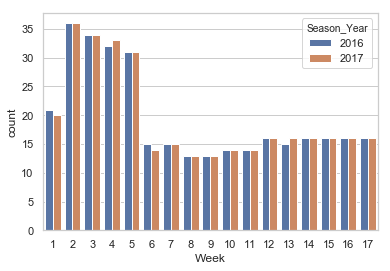

In [12]:
#Games per week by season
ax= sns.countplot(hue="Season_Year",x="Week", data=df)

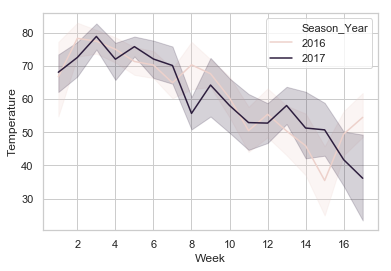

In [18]:
#Temperature as the weeks go on in each season

sns.lineplot(x="Week", y="Temperature",
             hue="Season_Year",
             data=df)

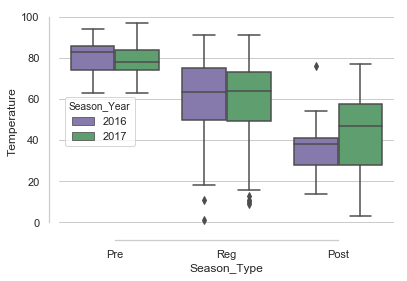

In [19]:
#
sns.boxplot(x="Season_Type", y="Temperature",
            hue="Season_Year", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

## At this point, I bring in the video review data to evaluate the characteristics of plays that contain concussions

In [21]:
df2 = pd.read_csv(os.path.join(kag_dir, "video_review.csv"))
df2.head()

,Season_Year,GameKey,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire,season,Type,Week,Home_team,Visit_Team,Qtr,PlayDescription,gamekey,playid,PREVIEW LINK (5000K)
0,2016,5,3129,31057,Tackling,No,Helmet-to-body,32482,Tackled,No,2016,Pre,2,Chicago Bears,Denver Broncos,3,(3:44) (Punt formation) P.O'Donnell punts 58 y...,5,3129,http://a.video.nfl.com//films/vodzilla/153233/...
1,2016,21,2587,29343,Blocked,No,Helmet-to-helmet,31059,Blocking,No,2016,Pre,3,Tennessee Titans,Carolina Panthers,3,(5:52) (Punt formation) K.Redfern punts 36 yar...,21,2587,http://a.video.nfl.com//films/vodzilla/153234/...
2,2016,29,538,31023,Tackling,No,Helmet-to-body,31941,Tackled,No,2016,Pre,3,Washington Redskins,New York Jets,1,"(4:46) L.Edwards punts 51 yards to WAS 27, Cen...",29,538,http://a.video.nfl.com//films/vodzilla/153235/...
3,2016,45,1212,33121,Tackling,No,Helmet-to-body,28249,Tackled,No,2016,Pre,4,New York Jets,New York Giants,2,"(8:29) B.Wing punts 44 yards to NYJ 10, Center...",45,1212,http://a.video.nfl.com//films/vodzilla/153236/...
4,2016,54,1045,32444,Blocked,No,Helmet-to-body,31756,Blocked,Yes,2016,Pre,5,Detroit Lions,Buffalo Bills,1,"(:38) C.Schmidt punts 46 yards to DET 8, Cente...",60,905,http://a.video.nfl.com//films/vodzilla/153237/...


In [31]:
df2.describe()

,Season_Year,GameKey,PlayID,GSISID,season,Week,Qtr,gamekey,playid
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2016.486486,323.216216,2185.675676,30642.135135,2016.486486,8.621622,2.621622,323.216216,2185.675676
std,0.506712,183.869842,1036.877981,2685.009964,0.506712,5.095485,0.953105,183.869842,1036.877981
min,2016.000000,5.000000,183.000000,23564.000000,2016.000000,1.000000,1.000000,5.000000,183.000000
25%,2016.000000,218.000000,1262.000000,28987.000000,2016.000000,4.000000,2.000000,218.000000,1262.000000
50%,2016.000000,296.000000,2341.000000,31313.000000,2016.000000,8.000000,3.000000,296.000000,2341.000000
75%,2017.000000,448.000000,2918.000000,32615.000000,2017.000000,14.000000,3.000000,448.000000,2918.000000
max,2017.000000,618.000000,3746.000000,33941.000000,2017.000000,16.000000,4.000000,618.000000,3746.000000


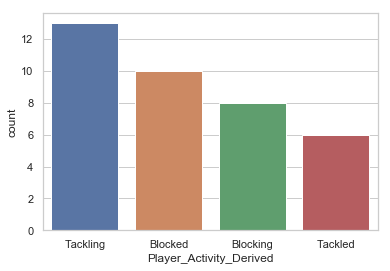

In [22]:
#Countplot for player activity when concussion occurs
ax = sns.countplot(x="Player_Activity_Derived", data=df2)

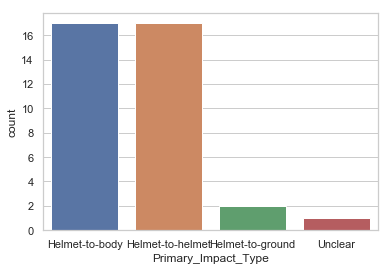

In [23]:
#Countplot for impact type when concussion occurs
ax = sns.countplot(x="Primary_Impact_Type", data=df2)

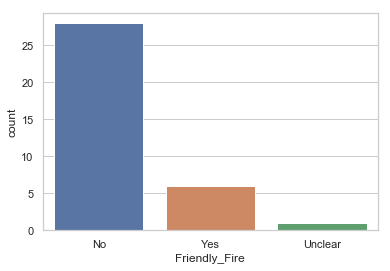

In [24]:
#Countplot for occurence of friendly fire when concussion occurs
ax = sns.countplot(x="Friendly_Fire", data=df2)

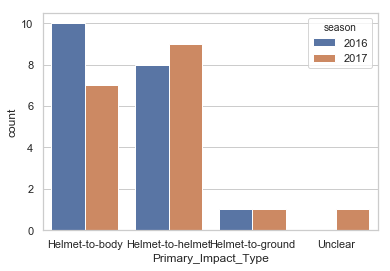

In [25]:
#Countplot for impact type by year
ax = sns.countplot(x="Primary_Impact_Type", hue="season", data=df2)

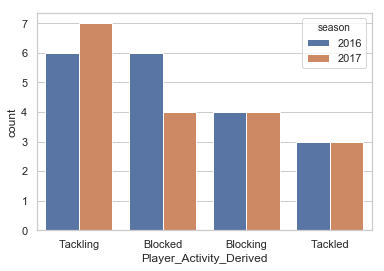

In [26]:
#Countplot for player activity when concussion occurs by year
ax = sns.countplot(x="Player_Activity_Derived", hue="season", data=df2)

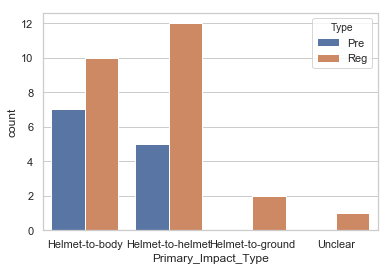

In [27]:
#Countplot for impact type by section of season. Notice there are no concussions in the preseason
ax = sns.countplot(x="Primary_Impact_Type", hue="Type", data=df2)

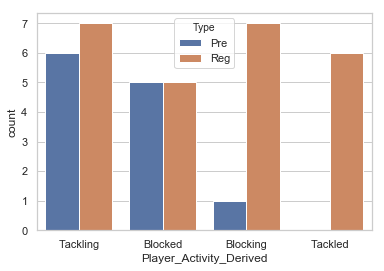

In [28]:
#Countplot for player activity when concussion occurs by season section
ax = sns.countplot(x="Player_Activity_Derived", hue="Type", data=df2)

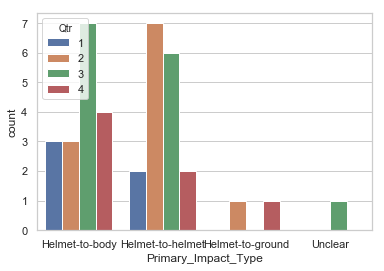

In [29]:
# Impact cauasing concussion by quarter of the game
#This is interesting. What is happening after half-time?
ax = sns.countplot(x="Primary_Impact_Type", hue="Qtr", data=df2)

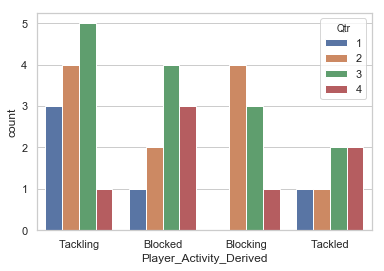

In [30]:
x = sns.countplot(x="Player_Activity_Derived", hue="Qtr", data=df2)